In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 28.6 MB/s 


In [4]:
import neattext as nt
import pandas as pd
import numpy as np
import neattext.functions as nfx
from sklearn.feature_extraction.text import CountVectorizer 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from xgboost.sklearn import XGBClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

#from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, TimeDistributed, Bidirectional, Embedding, Dropout, Flatten, Layer, Input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K

import warnings
warnings.filterwarnings("ignore")

In [6]:
!pip show neattext

Name: neattext
Version: 0.1.3
Summary: Neattext - a simple NLP package for cleaning text
Home-page: https://github.com/Jcharis/neattext
Author: Jesse E.Agbe(JCharis)
Author-email: jcharistech@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: 


In [7]:
df = pd.read_csv(r"/content/drive/MyDrive/mini_pro/data/tw.csv.xls")

In [8]:
df.head()

,content,score,at
0,My twitter keeps refreshing itself and sending...,1,2022-09-14 22:29:50
1,Looks like it won't load anything if my phone ...,1,2022-09-14 18:53:36
2,The app is not working at all. I removed the c...,1,2022-09-14 01:12:51
3,Since the latest update on 11th September 2022...,5,2022-09-14 00:08:01
4,They definitely need to do something about all...,4,2022-09-13 18:45:47


In [9]:
df.columns

Index(['content', 'score', 'at'], dtype='object')

In [10]:
df=df[["content","score"]]

In [11]:
df.iloc[20]["content"]

'For those less fortunate.... trying to fit in 🤷\u200d♂️'

- converting the data into lower case 

In [12]:
# Lowering the text
df['content']= df['content'].apply(lambda x: x.lower())

In [13]:
df.iloc[20]["content"]

'for those less fortunate.... trying to fit in 🤷\u200d♂️'

**task**
- Removal Punctuation 
- remove html tags
- Remove special character 
- remove userhandels / mentions
- remove hastags
- remove stopwords


In [14]:
# method/attributes
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [15]:
# methos /attributes  of nfx
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [16]:
df.iloc[20]["content"]

'for those less fortunate.... trying to fit in 🤷\u200d♂️'

## function approch

In [17]:
df.head()


,content,score
0,my twitter keeps refreshing itself and sending...,1
1,looks like it won't load anything if my phone ...,1
2,the app is not working at all. i removed the c...,1
3,since the latest update on 11th september 2022...,5
4,they definitely need to do something about all...,4


In [18]:
df['Clean_Text']=df.content.apply(nfx.remove_userhandles)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_stopwords)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_hashtags)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_special_characters)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_emojis)

In [19]:
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_phone_numbers)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_currencies)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_dates)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_urls)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_emails)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_currency_symbols)
df['Clean_Text']=df.Clean_Text.apply(nfx.fix_contractions)

In [20]:
df.iloc[65]["content"]

"this app turned me into a furry. wouldn't recommend, absolutely trash 💀🖕"

In [21]:
df.iloc[65]["Clean_Text"]

'app turned furry recommend absolutely trash '

In [22]:
df.head()

,content,score,Clean_Text
0,my twitter keeps refreshing itself and sending...,1,twitter keeps refreshing sending timeline maki...
1,looks like it won't load anything if my phone ...,1,looks like load phone pixel 6 pro permissions ...
2,the app is not working at all. i removed the c...,1,app working all removed cache stopped app rein...
3,since the latest update on 11th september 2022...,5,latest update 11th september 2022 twitter andr...
4,they definitely need to do something about all...,4,definitely need bots ad preferences work well


In [23]:
# Preview some of the pairs of questions
a = 0 
for i in range(a,a+10):
    print(df.Clean_Text[i])
    print()

twitter keeps refreshing sending timeline making miss tweets

looks like load phone pixel 6 pro permissions allow notifications app disable specific notification types main permission enabled poor qa  uat shows promoted tweets sources blocked block source promoted tweet looks like actually anything

app working all removed cache stopped app reinstalled solved issue check issue android 13 pixel 4a 5g

latest update 11th september 2022 twitter android keeps crashing constantly thing im able like tweets notifications  allmentions send new tweet app crashes attempt to select usertweet screen view home screen blank view profile view bookmarks view followers following select storytweet search screen view search screen select space fix asap possibly html parsing issue

definitely need bots ad preferences work well

think okay idea play ads videos ridiculous website awful experience

great touch people

cant link preview  thumbnail copy pasting whatsapp chat

account disabled 1 day sure want l

In [24]:
import seaborn as sns

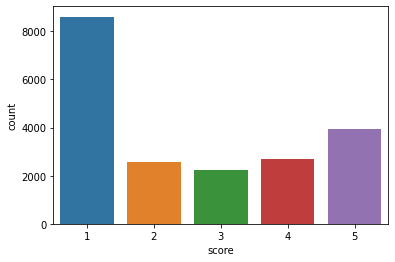

In [25]:
sns.countplot(x = 'score', data = df)

In [26]:
df.describe() #descriptive statistics

,score
count,20000.000000
mean,2.538300
std,1.599238
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


## droping duplicate

In [27]:
df.duplicated().sum()

4

In [28]:
df.shape

(20000, 3)

In [29]:
df=df.drop_duplicates()

In [30]:
df.shape

(19996, 3)

## visualization

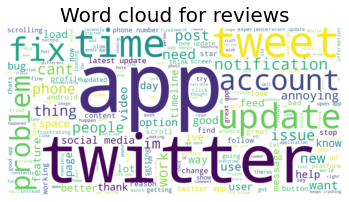

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

allwords = ' '.join([rev for rev in df['Clean_Text']])
wordcloud = WordCloud(width = 1200, height = 600, random_state = 23, background_color="white").generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for reviews',fontsize = 20)
plt.show()

In [32]:
from textblob import TextBlob
df['polarity'] = df.content.apply(lambda x: TextBlob(x).polarity)
df['subjectivity'] = df.content.apply(lambda x: TextBlob(x).subjectivity)

df.head()

,content,score,Clean_Text,polarity,subjectivity
0,my twitter keeps refreshing itself and sending...,1,twitter keeps refreshing sending timeline maki...,0.500000,0.750000
1,looks like it won't load anything if my phone ...,1,looks like load phone pixel 6 pro permissions ...,-0.058333,0.289583
2,the app is not working at all. i removed the c...,1,app working all removed cache stopped app rein...,0.000000,0.000000
3,since the latest update on 11th september 2022...,5,latest update 11th september 2022 twitter andr...,0.142045,0.551610
4,they definitely need to do something about all...,4,definitely need bots ad preferences work well,0.100000,0.350000


In [33]:
df['sentiment'] = np.where(df.polarity > 0, 'positive', np.where(df.polarity < 0, 'negative', 'neutral'))
#converting target variable to numeric labels
df.sentiment = [ 1 if each == "positive" else 0 for each in df.sentiment]
df.head()

,content,score,Clean_Text,polarity,subjectivity,sentiment
0,my twitter keeps refreshing itself and sending...,1,twitter keeps refreshing sending timeline maki...,0.500000,0.750000,1
1,looks like it won't load anything if my phone ...,1,looks like load phone pixel 6 pro permissions ...,-0.058333,0.289583,0
2,the app is not working at all. i removed the c...,1,app working all removed cache stopped app rein...,0.000000,0.000000,0
3,since the latest update on 11th september 2022...,5,latest update 11th september 2022 twitter andr...,0.142045,0.551610,1
4,they definitely need to do something about all...,4,definitely need bots ad preferences work well,0.100000,0.350000,1


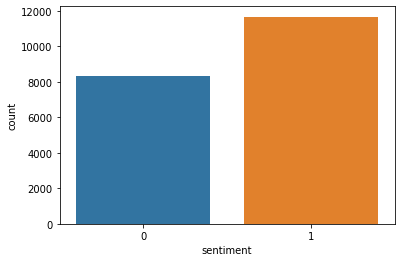

In [34]:
sns.countplot(x = 'sentiment', data = df)

In [35]:
# Shows the top 5 tweets with highest polarity scores
df.nlargest(10,'polarity')[['content','Clean_Text']]

,content,Clean_Text
28,awesome app to get knowlegable contents,awesome app knowlegable contents
51,"twitter is awesome, the best!!",twitter awesome best
157,it's a great way to spread biblical scripture!!!,great way spread biblical scripture
172,great application for people with opinions who...,great application people opinions cowards
630,best app for communication,best app communication
821,very wonderful via information and ideas exchange,wonderful information ideas exchange
909,best for publishing anything.,best publishing anything
958,the best app for trending news in the world,best app trending news world
963,"the app is great but, every time they ask for ...",app great but time ask phone number verificati...
989,"it's twitter, you know what to expect. the app...",twitter know expect app works perfectly intuit...


In [36]:
# Shows the top 5 tweets with lowest polarity scores
df.nsmallest(10,'polarity')[['content','Clean_Text']]

,content,Clean_Text
803,"every time update every time,, it's boring",time update time boring
1132,"worst, because you've permanently suspended my...",worst permanently suspended account reason twi...
1202,let us disable the annoying captions!,let disable annoying captions
1222,"worst app, video buffers a lot no changes,lag ...",worst app video buffers lot changeslag lag wha...
1268,zero support!!!! stupid promoted tweets!!!!! i...,zero support stupid promoted tweets use websit...
1524,"the recommendation tweet r so annoying, just l...",recommendation tweet r annoying like instagram...
1713,auto captions are terrible! give a setting to ...,auto captions terrible setting disable them
1728,the cc update is horrible!!!!!!!!!! get rid of...,cc update horrible rid option turn off
1755,"why every time i scroll, it goes up again? rea...",time scroll goes again annoying fix app
1768,worst app . always shown updating but don't up...,worst app shown updating update mobile hangs...


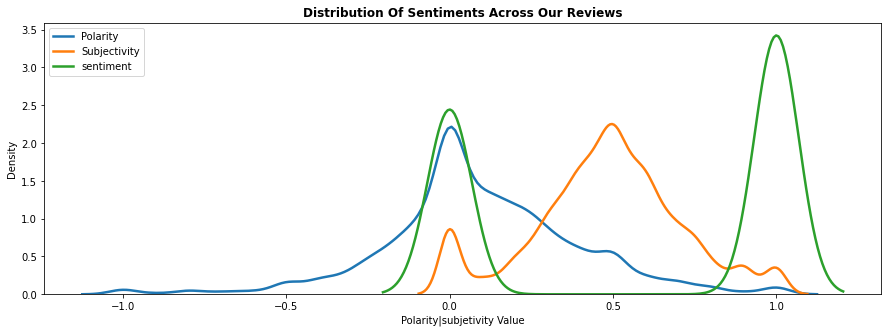

In [37]:
plt.figure(figsize=(15,5))
plt.title('Distribution Of Sentiments Across Our Reviews',fontsize=12,fontweight='bold')
sns.kdeplot(df['polarity'], label='Polarity', lw=2.5)
sns.kdeplot(df['subjectivity'], label='Subjectivity', lw=2.5)
sns.kdeplot(df['sentiment'], label='sentiment', lw=2.5)

plt.xlabel('Polarity|subjetivity Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
# Display the generated image:

plt.legend()
plt.show()

In [38]:
print('Positive reviews are', (round(df['sentiment'].value_counts()[0])),'i.e.', round(df['sentiment'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Negative reviews are', (round(df['sentiment'].value_counts()[1])),'i.e.',round(df['sentiment'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Positive reviews are 8328 i.e. 41.65 % of the dataset
Negative reviews are 11668 i.e. 58.35 % of the dataset


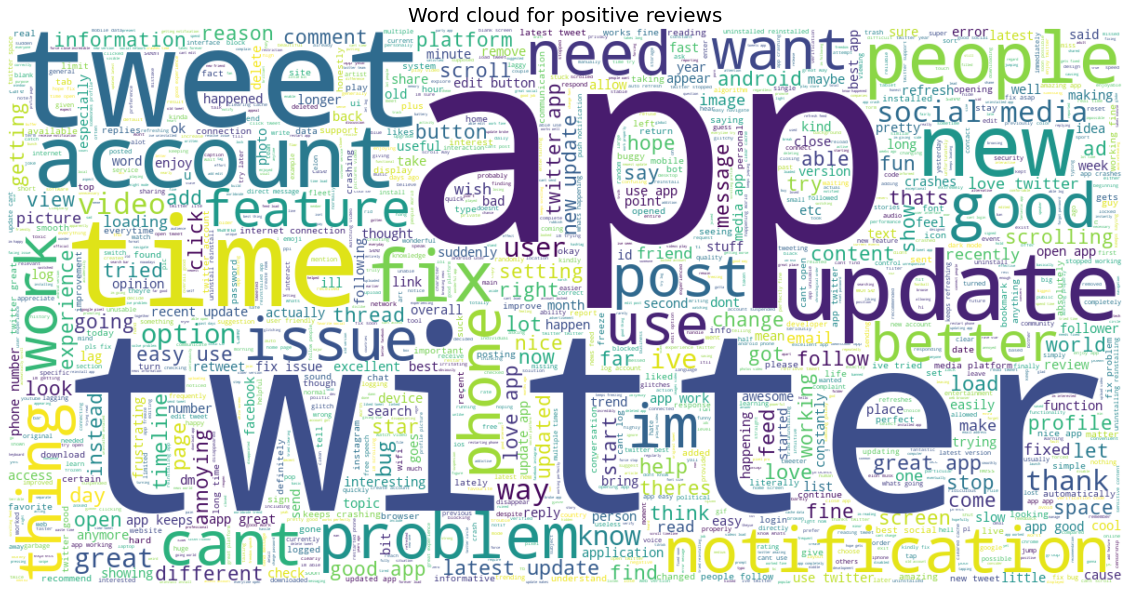

In [39]:
from wordcloud import WordCloud
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['Clean_Text']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

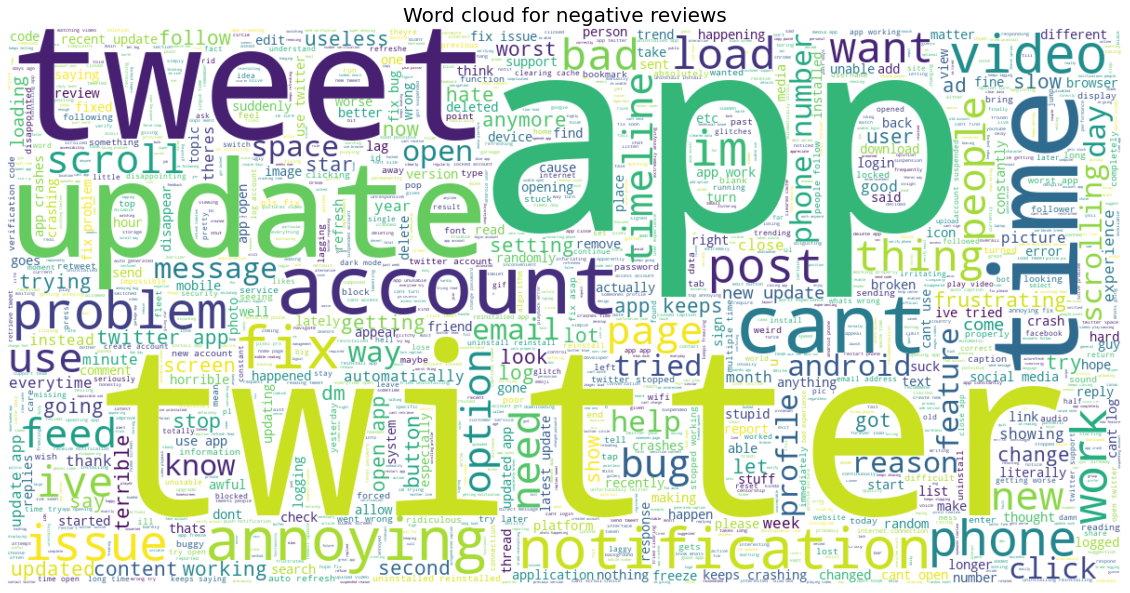

In [40]:
#word cloud for negative reviews
negative_data = df[df.sentiment == 0]['Clean_Text']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

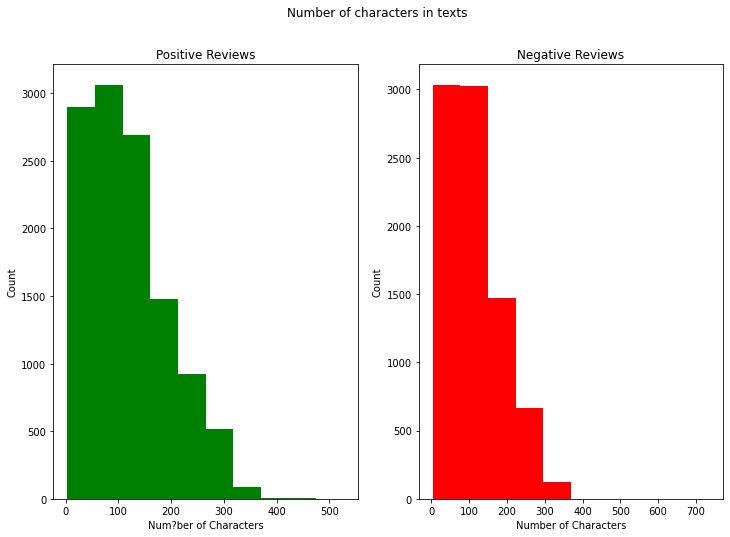

In [41]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_data.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Num?ber of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

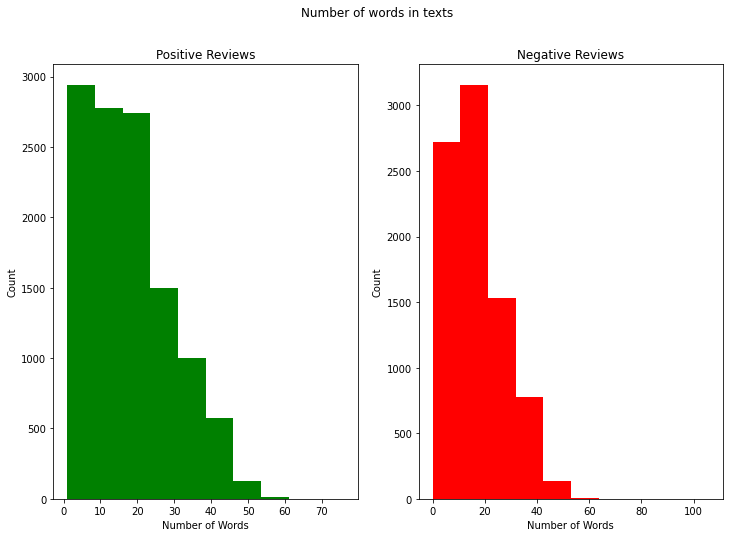

In [42]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

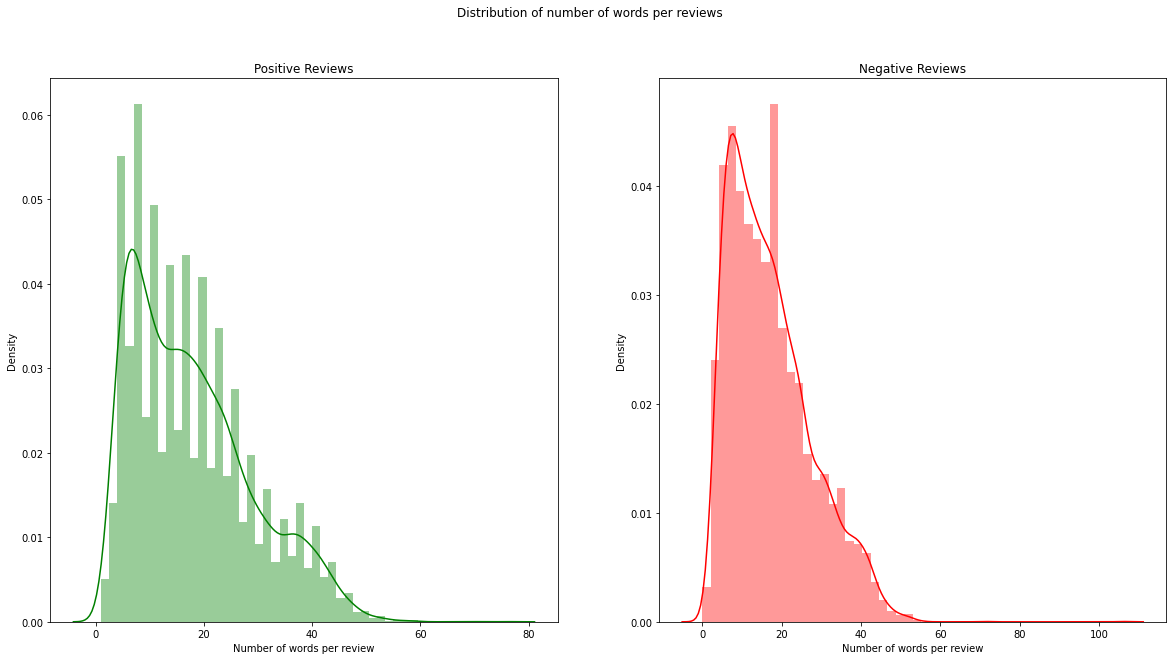

In [43]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

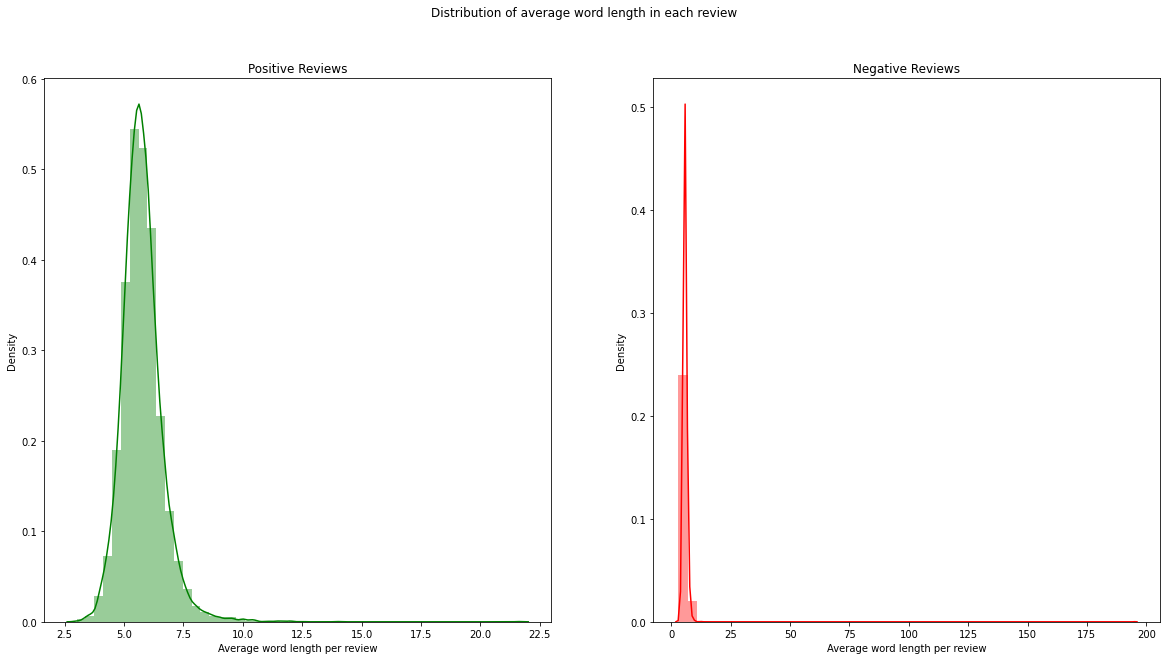

In [44]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Average word length per review')
word = negative_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Average word length per review')
fig.suptitle('Distribution of average word length in each review')
plt.show()

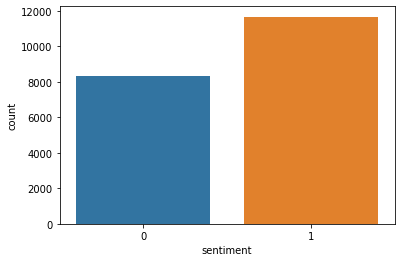

In [45]:
sns.countplot(x = 'sentiment', data = df)

In [46]:
df.columns

Index(['content', 'score', 'Clean_Text', 'polarity', 'subjectivity',
       'sentiment'],
      dtype='object')

In [47]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.Clean_Text)
corpus[:5]

['twitter', 'keeps', 'refreshing', 'sending', 'timeline']

In [48]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

,corpus,countv
0,app,12925
1,twitter,7542
2,update,3617
3,cant,3226
4,fix,3164
5,like,3072
6,account,2770
7,tweets,2602
8,it,2475
9,time,2422


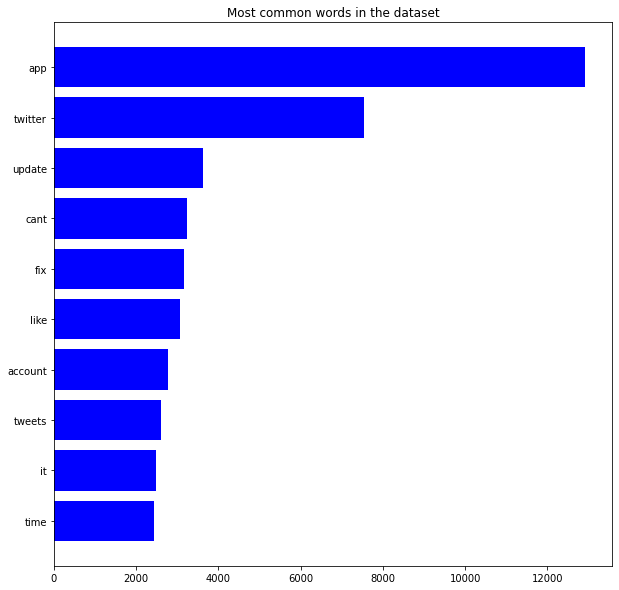

In [49]:
most_common = most_common.sort_values('countv')
plt.figure(figsize =(10,10))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'blue')
plt.title('Most common words in the dataset')
plt.show()

In [50]:
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

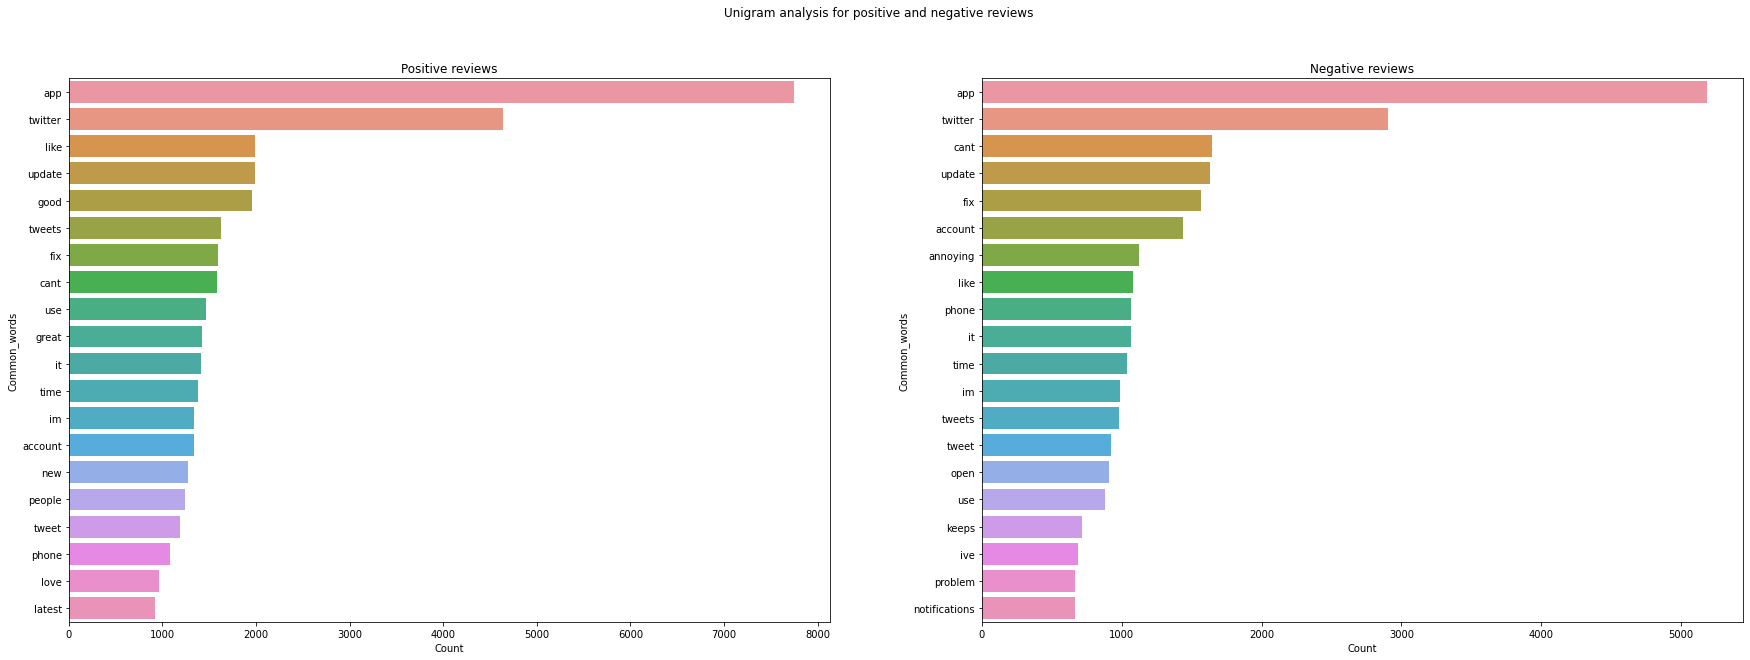

In [51]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30, 10))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()

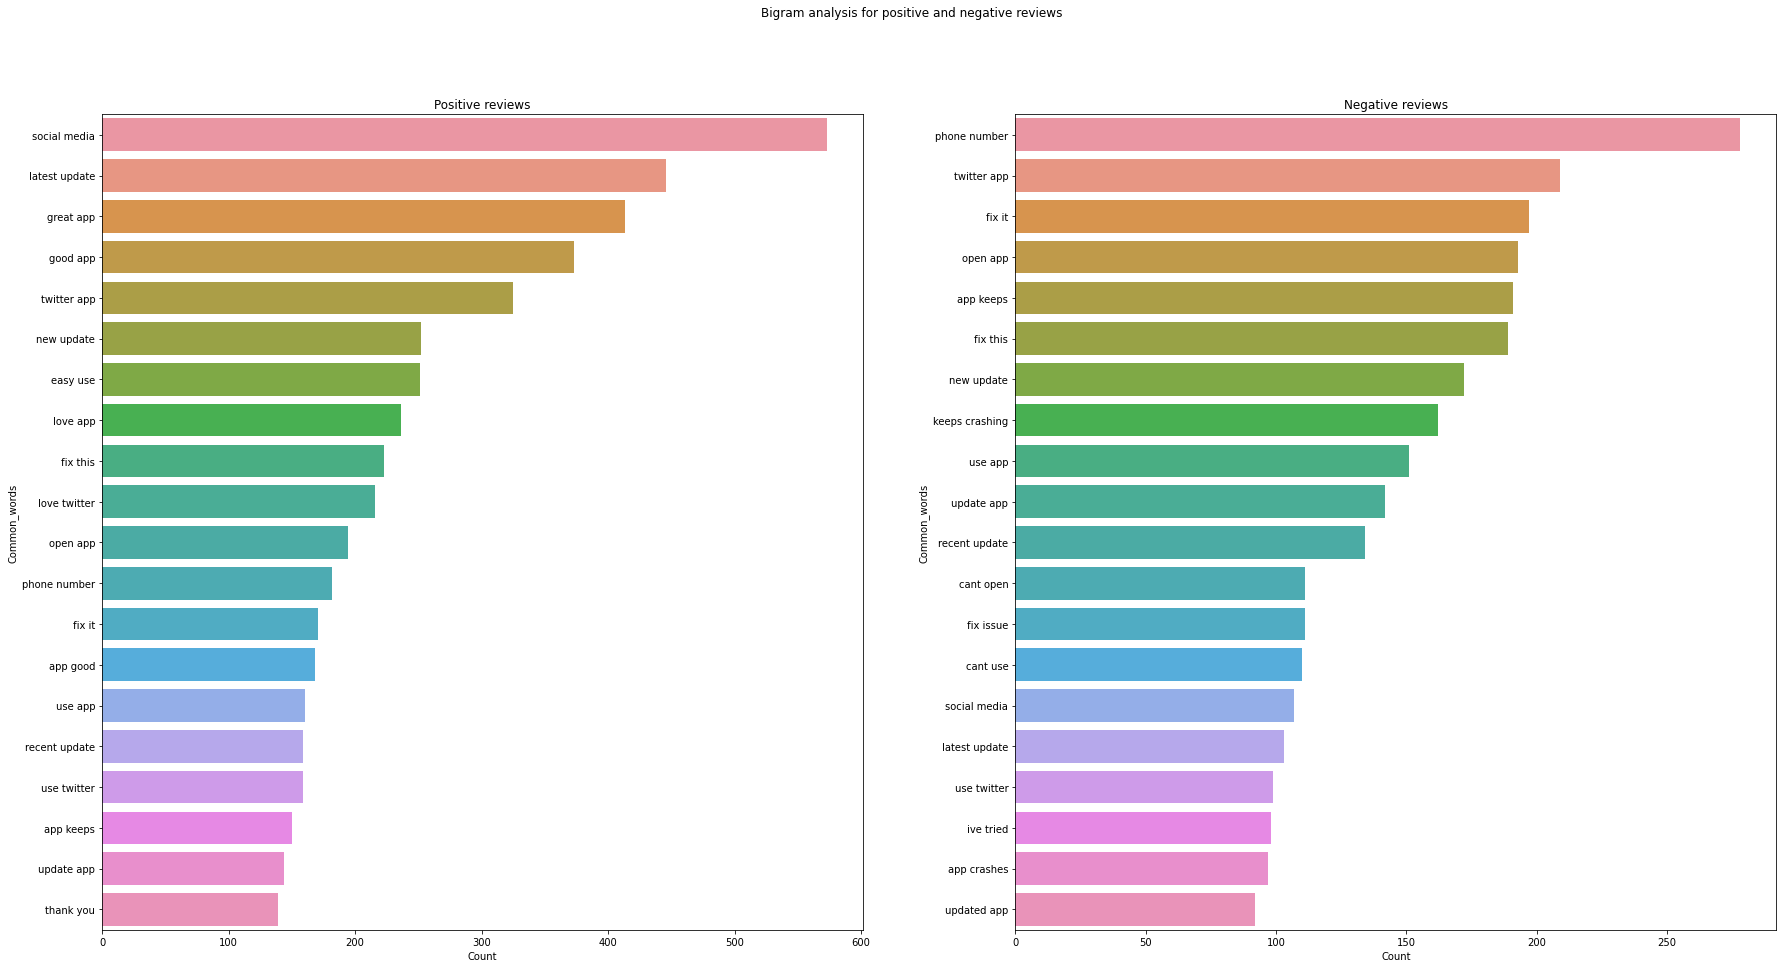

In [52]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

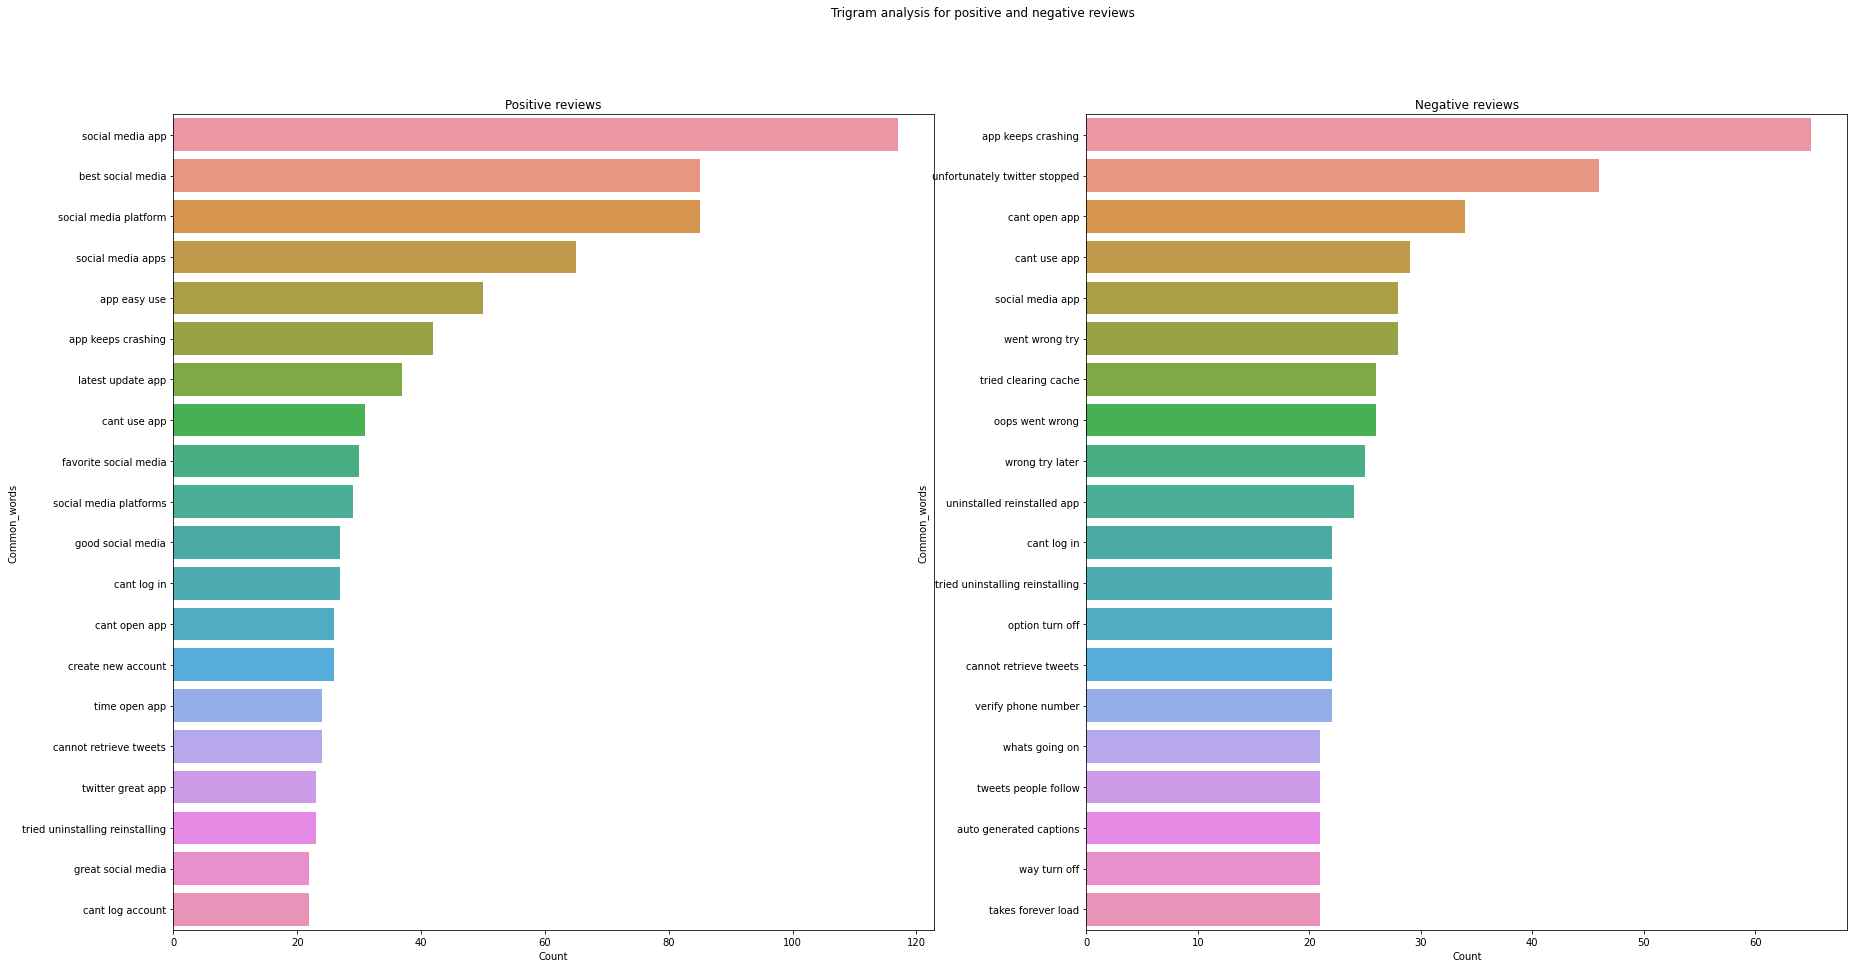

In [53]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [54]:
df.head()

,content,score,Clean_Text,polarity,subjectivity,sentiment
0,my twitter keeps refreshing itself and sending...,1,twitter keeps refreshing sending timeline maki...,0.500000,0.750000,1
1,looks like it won't load anything if my phone ...,1,looks like load phone pixel 6 pro permissions ...,-0.058333,0.289583,0
2,the app is not working at all. i removed the c...,1,app working all removed cache stopped app rein...,0.000000,0.000000,0
3,since the latest update on 11th september 2022...,5,latest update 11th september 2022 twitter andr...,0.142045,0.551610,1
4,they definitely need to do something about all...,4,definitely need bots ad preferences work well,0.100000,0.350000,1


In [55]:
df.rename(columns = {'Clean_Text':'review'}, inplace = True)

In [56]:
df.head()

,content,score,review,polarity,subjectivity,sentiment
0,my twitter keeps refreshing itself and sending...,1,twitter keeps refreshing sending timeline maki...,0.500000,0.750000,1
1,looks like it won't load anything if my phone ...,1,looks like load phone pixel 6 pro permissions ...,-0.058333,0.289583,0
2,the app is not working at all. i removed the c...,1,app working all removed cache stopped app rein...,0.000000,0.000000,0
3,since the latest update on 11th september 2022...,5,latest update 11th september 2022 twitter andr...,0.142045,0.551610,1
4,they definitely need to do something about all...,4,definitely need bots ad preferences work well,0.100000,0.350000,1


##splitting into train and test

In [57]:

train, test= train_test_split(df, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']

##model building

In [58]:
!pip install autoNLP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 5.9 MB/s 
     |████████████████████████████████| 61 kB 9.1 MB/s 
     |████████████████████████████████| 264 kB 56.5 MB/s 
     |████████████████████████████████| 69 kB 8.7 MB/s 
     |████████████████████████████████| 212 kB 72.3 MB/s 
     |████████████████████████████████| 115 kB 73.5 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: prettytable
    Found existing installation: prettytable 3.5.0
    Uninstalling prettytable-3.5.0:
      Successfully uninstalled prettytable-3.5.0


In [59]:
!pip install autoviml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 37.9 MB/s 
     |████████████████████████████████| 569 kB 61.0 MB/s 
     |████████████████████████████████| 240 kB 70.0 MB/s 
     |████████████████████████████████| 76.6 MB 2.0 MB/s 
     |████████████████████████████████| 125 kB 16.7 MB/s 
     |████████████████████████████████| 268 kB 64.8 MB/s 
     |████████████████████████████████| 255.9 MB 41 kB/s 
     |████████████████████████████████| 11.2 MB 52.0 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 
     |████████████████████████████████| 965 kB 62.1 MB/s 
     |████████████████████████████████| 1.6 MB 61.0 MB/s 
     |████████████████████████████████| 121 kB 73.4 MB/s 
     |████████████████████████████████| 83 kB 2.4 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=047ed9e4ddf83d980b4a0be41e2650e06c914fae8755a6a7cb2a1fb8f9a112b7
 

In [60]:
train, test = train_test_split(df, test_size=0.2)

In [61]:
from autoviml.Auto_NLP import Auto_NLP

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Auto NLP processing on NLP Column: review
Shape of Train Data: 15996 rows
    Shape of Test Data: 4000 rows


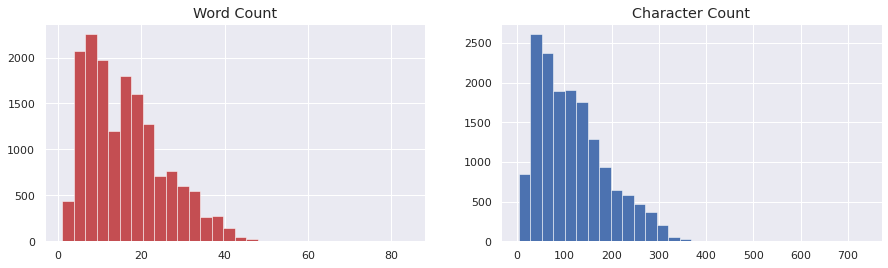

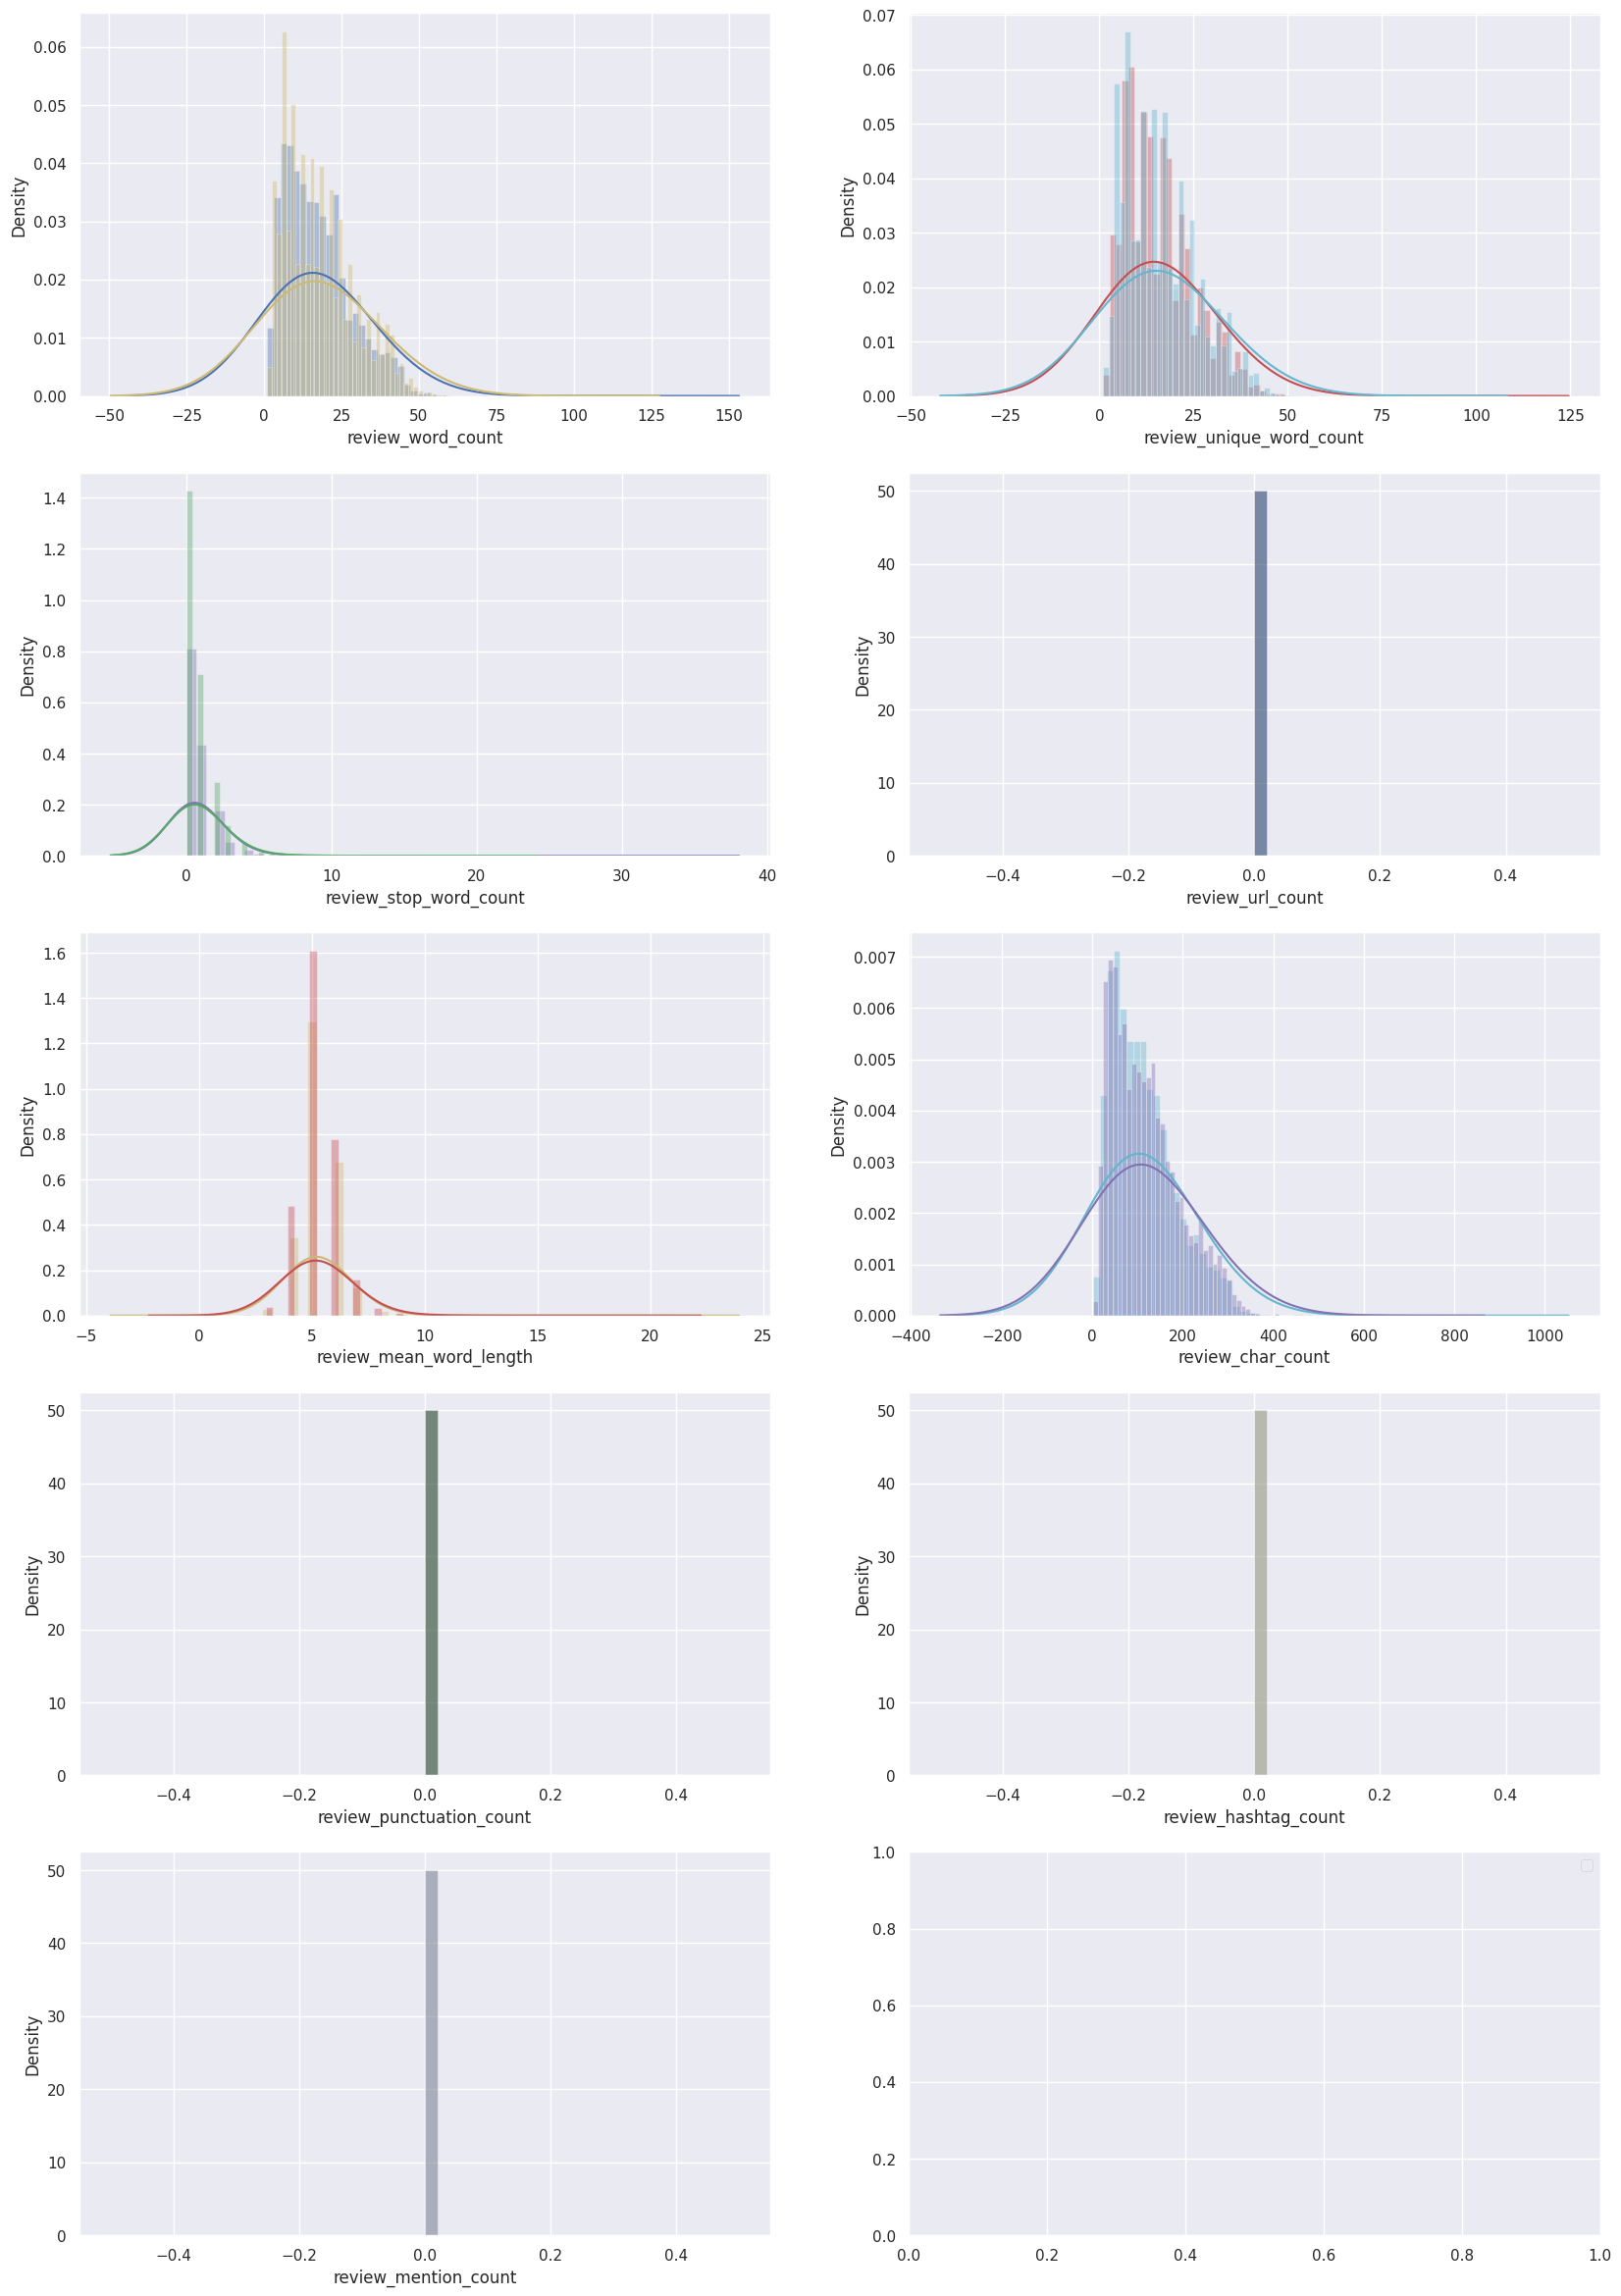

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for review column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 29 seconds

For target = sentiment

    For class = 0
Top 200 n-grams
: ['applic', 'updat', 'twitter', 'fix', 'cant', 'open', 'work', 'tweet', 'time', 'annoy', 'crash', 'video', 'tri', 'account', 'scroll', 'keep', 'like', 'load', 'phone', 'problem', 'im', 'use', 'stop', 'notif', 'issu', 'close', 'log', 'refresh', 'ive', 'new', 'reinstal', 'uninstal', 'day', 'page', 'option', 'want', 'bug', 'happen', 'bad', 'post', 'android', 'follow', 'feed', 'need', 'click', 'messag', 'timelin', 'turn', 'know', 'chang', 'screen', 'profil', 'peopl', 'worst', 'way', 'button', 'read', 'thing', 'slow', 'send', 'freez', 'show', 'play', 'soon', 'automat', 'frustrat', 'caption', 'experi', 'everytim', 'number', 'star', 'make', 'reason', 'there', 'go', '

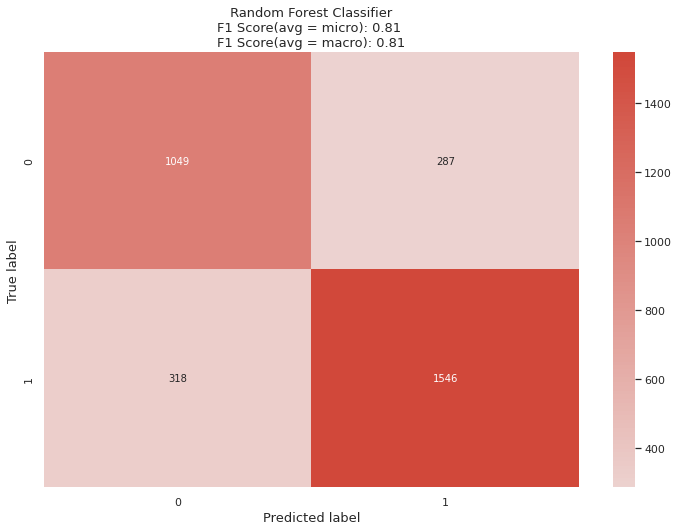

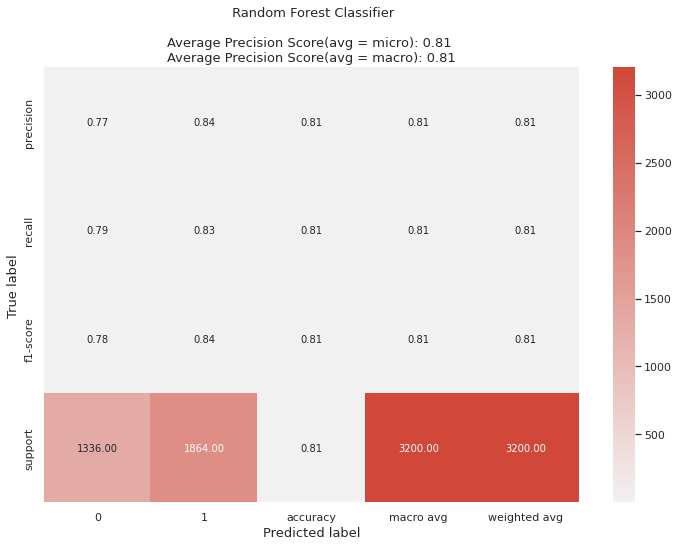

  Now transforming Train data to return as output...
  Transforming Test data to return as output...
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
Training completed. Time taken for Auto_NLP = 28.5 minutes


In [62]:
nlp_column = 'review'
target = 'sentiment'

train_nlp, test_nlp, nlp_transformer, preds = Auto_NLP(nlp_column, train, test, target, score_type='balanced_accuracy', modeltype='Classification', top_num_features=500, verbose = 2, build_model=True
)

In [63]:
nlp_transformer.predict(test_nlp[nlp_column])

array([0, 1, 0, ..., 0, 1, 0])

In [64]:
nlp_transformer.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function Auto_NLP.<locals>.<lambda> at 0x7fa45453def0>)),
                ('tfidfvectorizer',
                 TfidfVectorizer(binary=True, max_df=0.36050726453927373,
                                 max_features=4540, min_df=2,
                                 ngram_range=(1, 3), sublinear_tf=True,
                                 token_pattern='\\w{1,}')),
                ('selectkbest',
                 SelectKBest(k=4540,
                             score_func=<function chi2 at 0x7fa455c03440>)),
                ('calibratedclassifiercv',
                 CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=200,
                                                                              n_jobs=-1,
                                                                              random_state=99),
                                        cv=3, me

In [65]:
test_nlp['label'] = nlp_transformer.predict(test_nlp[nlp_column])

In [66]:
test_nlp

,content,score,review,polarity,subjectivity,sentiment,review_word_count,review_unique_word_count,review_stop_word_count,review_url_count,review_mean_word_length,review_char_count,review_punctuation_count,review_hashtag_count,review_mention_count,abil,abl,abl access,abl chang,abl edit,abl log,abl login,abl open,abl open applic,abl turn,abl tweet,abl use,abl use applic,absolut,absolut love,abu,acc,accept,access,access account,access applic,access twitter,accid,accord,account,account account,account annoy,account anymor,account applic,account back,account block,account cant,account chang,account creat,account day,...,world wide,worldwid,worldwid trend,worri,worst,worst applic,worst applic ever,worst experi,worst thing,worst updat,worth,worthless,would,wouldv,wow,write,write review,write tweet,written,wrong,wrong applic,wrong tri,wrong tri later,wrong twitter,wrote,wth,x,xiaomi,yall,yall fix,ye,yeah,year,year ago,year applic,year ive,year now,year old,year problem,year time,yesterday,yet,yo,your,youtub,youtub video,yr,zero,zero star,zoom
11606,very dissapointed. always back to the top feeds when scrolled down feeds. you have to fix it as soon as possible.,1,dissapointed feeds scrolled feeds fix soon possible,0.11,0.42,1,7,6,0,0,6,51,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
17061,"i've been using twitter for years, but recently, i haven't been able to load anything using the app. it's weird because it won't work or load at all with wifi, but will work fine with my data. it's even weirder that this only happens on my android phone. i have twitter for iphone and it works well with my wifi. it's getting really inconvenient for me to switch back and forth, especially since i'm on twitter a lot. please fix this.",1,ive twitter years recently able load app weird work load wifi work fine data weirder happens android phone twitter iphone works wifi getting inconvenient switch forth especially im twitter lot fix this,-0.02,0.67,0,32,27,1,0,5,201,0,0,0,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3840,i cannot get any notification from tweeter on my phone. why is this happening? everytime i install it and then reinstall it. but the problem is getting worst. please fix this problem.,1,notification tweeter phone happening everytime install reinstall it problem getting worst fix problem,-1.00,1.00,0,13,12,1,0,6,101,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18743,"great app😍 but need a little bit changes to be more user friendly🤗 (for example add a search box🔍 when viewing the followers or the followings of some account.... and also other changes..) in plus there is a huge number of accounts violating twitter rules, and unfortunately people always choose to block these accounts instead of report them 😑",4,great app need little bit changes user friendly for example add search box viewing followers 

In [67]:
df

,content,score,review,polarity,subjectivity,sentiment
0,"my twitter keeps refreshing itself and sending me to the top of my timeline, making me miss the tweets.",1,twitter keeps refreshing sending timeline making miss tweets,0.50,0.75,1
1,"looks like it won't load anything if my phone (pixel 6 pro) permissions don't allow notifications for the app. i can disable all of the specific notification types but must have the main permission enabled. poor qa & uat. it also now shows me promoted tweets even for sources i blocked. i block a source whenever i see a promoted tweet, but it looks like this doesn't actually do anything.",1,looks like load phone pixel 6 pro permissions allow notifications app disable specific notification types main permission enabled poor qa uat shows promoted tweets sources blocked block source promoted tweet looks like actually anything,-0.06,0.29,0
2,"the app is not working at all. i removed the cache, stopped the app and reinstalled. nothing has solved the issue. can someone please check on this issue? (android 13, pixel 4a 5g)",1,app working all removed cache stopped app reinstalled solved issue check issue android 13 pixel 4a 5g,0.00,0.00,0
3,"since the latest update on 11th september 2022, twitter for android keeps crashing constantly. the only thing i'm able to do is like tweets within notifications - all/mentions and send a new tweet. the app crashes when i attempt to: select user/tweet on any screen. view the home screen, which is blank. view my profile. view bookmarks. view followers or following. select a story/tweet on the search screen. view search screen. select a space. please fix this asap. possibly an html parsing issue.",5,latest update 11th september 2022 twitter android keeps crashing constantly thing im able like tweets notifications allmentions send new tweet app crashes attempt to select usertweet screen view home screen blank view profile view bookmarks view followers following select storytweet search screen view search screen select space fix asap possibly html parsing issue,0.14,0.55,1
4,they definitely need to do something about all the bots. and the ad preferences really don't work well.,4,definitely need bots ad preferences work well,0.10,0.35,1
...,...,...,...,...,...,...
19995,"overall app experience is good but for devices like the s8, s9, etc where you have the option to have a full screen mode, liking and retweeting doesnt work when you are looking at an image or video full screen",4,overall app experience good devices like s8 s9 etc option screen mode liking retweeting doesnt work looking image video screen,0.35,0.43,1
19996,"i think there is a bug or maybe its just me. but when i receive a notificacion of a single post, i receive the notification 3 to 5 times at least. once is more than enough.",3,think bug maybe me receive notificacion single post receive notification 3 5 times least enough,0.03,0.40,1
19997,"great app, love the updates. only problem is that with android 9, tapping on twitter notifications does not open twitter to that tweet whether the application is open or closed. and the times that it does it is severely delayed",5,great app love updates problem android 9 tapping twitter notifications open twitter tweet application open closed times severely delayed,0.20,0.58,1
19998,"ever since the last update, pictures don't load when on wifi. my wifi connection is fine, and i've seen others complain about this as well. please fix this! it's frustrating to have to turn my wifi off and on every time i want to use twitter.",3,update pictures load wifi wifi connection fine ive seen complain well fix this frustrating turn wifi time want use twitter,0.04,0.49,1


In [68]:
#Vectorizing data

tfidf_vect = TfidfVectorizer() #tfidfVectorizer
Xtrain_tfidf = tfidf_vect.fit_transform(Xtrain)
Xtest_tfidf = tfidf_vect.transform(Xtest)
count_vect = CountVectorizer() # CountVectorizer
Xtrain_count = count_vect.fit_transform(Xtrain)
Xtest_count = count_vect.transform(Xtest)

Logistic Regression Accuracy : 83.55%
[[1277  400]
 [ 258 2065]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1677
           1       0.84      0.89      0.86      2323

    accuracy                           0.84      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.84      0.84      0.83      4000



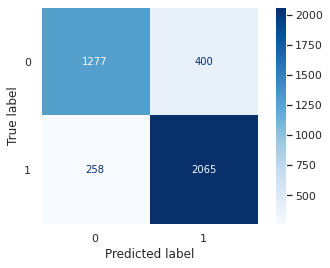

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
lr = LogisticRegression()
lr.fit(Xtrain_tfidf,ytrain)
p1=lr.predict(Xtest_tfidf)
s1=accuracy_score(ytest,p1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)
print(confusion_matrix(ytest, p1))
print(metrics.classification_report(ytest, p1))

Linear Support Vector Classifier Accuracy : 83.75%
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1677
           1       0.86      0.87      0.86      2323

    accuracy                           0.84      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.84      0.84      0.84      4000



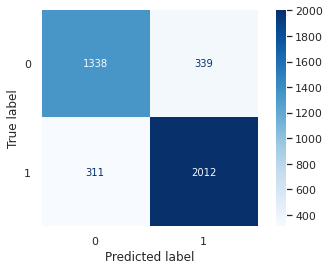

In [70]:
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(Xtrain_tfidf,ytrain)
p3=linear_svc.predict(Xtest_tfidf)
s3=accuracy_score(ytest,p3)
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(linear_svc, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p3))

XGBoost Accuracy : 78.53%
              precision    recall  f1-score   support

           0       0.70      0.84      0.77      1677
           1       0.87      0.74      0.80      2323

    accuracy                           0.79      4000
   macro avg       0.79      0.79      0.78      4000
weighted avg       0.80      0.79      0.79      4000



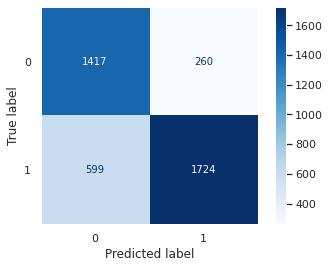

In [71]:
xgbo = XGBClassifier()
xgbo.fit(Xtrain_tfidf,ytrain)
p4=xgbo.predict(Xtest_tfidf)
s4=accuracy_score(ytest,p4)
print("XGBoost Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p4))

Random Forest Accuracy : 78.53%
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1677
           1       0.82      0.85      0.84      2323

    accuracy                           0.81      4000
   macro avg       0.80      0.80      0.80      4000
weighted avg       0.81      0.81      0.81      4000



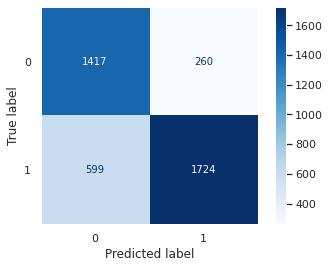

In [72]:
rf = RandomForestClassifier()
rf.fit(Xtrain_tfidf,ytrain)
p5=rf.predict(Xtest_tfidf)
s5=accuracy_score(ytest,p4)
print("Random Forest Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p5))

Decision Tree Accuracy : 78.53%
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1677
           1       0.80      0.81      0.80      2323

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000



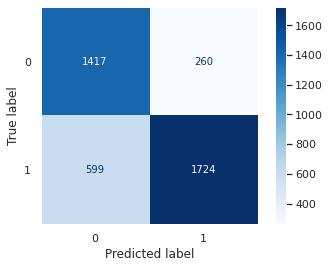

In [73]:
rf = DecisionTreeClassifier()
rf.fit(Xtrain_tfidf,ytrain)
p6=rf.predict(Xtest_tfidf)
s6=accuracy_score(ytest,p4)
print("Decision Tree Accuracy :", "{:.2f}%".format(100*s6))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p6))

In [75]:
df

,content,score,review,polarity,subjectivity,sentiment
0,"my twitter keeps refreshing itself and sending me to the top of my timeline, making me miss the tweets.",1,twitter keeps refreshing sending timeline making miss tweets,0.50,0.75,1
1,"looks like it won't load anything if my phone (pixel 6 pro) permissions don't allow notifications for the app. i can disable all of the specific notification types but must have the main permission enabled. poor qa & uat. it also now shows me promoted tweets even for sources i blocked. i block a source whenever i see a promoted tweet, but it looks like this doesn't actually do anything.",1,looks like load phone pixel 6 pro permissions allow notifications app disable specific notification types main permission enabled poor qa uat shows promoted tweets sources blocked block source promoted tweet looks like actually anything,-0.06,0.29,0
2,"the app is not working at all. i removed the cache, stopped the app and reinstalled. nothing has solved the issue. can someone please check on this issue? (android 13, pixel 4a 5g)",1,app working all removed cache stopped app reinstalled solved issue check issue android 13 pixel 4a 5g,0.00,0.00,0
3,"since the latest update on 11th september 2022, twitter for android keeps crashing constantly. the only thing i'm able to do is like tweets within notifications - all/mentions and send a new tweet. the app crashes when i attempt to: select user/tweet on any screen. view the home screen, which is blank. view my profile. view bookmarks. view followers or following. select a story/tweet on the search screen. view search screen. select a space. please fix this asap. possibly an html parsing issue.",5,latest update 11th september 2022 twitter android keeps crashing constantly thing im able like tweets notifications allmentions send new tweet app crashes attempt to select usertweet screen view home screen blank view profile view bookmarks view followers following select storytweet search screen view search screen select space fix asap possibly html parsing issue,0.14,0.55,1
4,they definitely need to do something about all the bots. and the ad preferences really don't work well.,4,definitely need bots ad preferences work well,0.10,0.35,1
...,...,...,...,...,...,...
19995,"overall app experience is good but for devices like the s8, s9, etc where you have the option to have a full screen mode, liking and retweeting doesnt work when you are looking at an image or video full screen",4,overall app experience good devices like s8 s9 etc option screen mode liking retweeting doesnt work looking image video screen,0.35,0.43,1
19996,"i think there is a bug or maybe its just me. but when i receive a notificacion of a single post, i receive the notification 3 to 5 times at least. once is more than enough.",3,think bug maybe me receive notificacion single post receive notification 3 5 times least enough,0.03,0.40,1
19997,"great app, love the updates. only problem is that with android 9, tapping on twitter notifications does not open twitter to that tweet whether the application is open or closed. and the times that it does it is severely delayed",5,great app love updates problem android 9 tapping twitter notifications open twitter tweet application open closed times severely delayed,0.20,0.58,1
19998,"ever since the last update, pictures don't load when on wifi. my wifi connection is fine, and i've seen others complain about this as well. please fix this! it's frustrating to have to turn my wifi off and on every time i want to use twitter.",3,update pictures load wifi wifi connection fine ive seen complain well fix this frustrating turn wifi time want use twitter,0.04,0.49,1


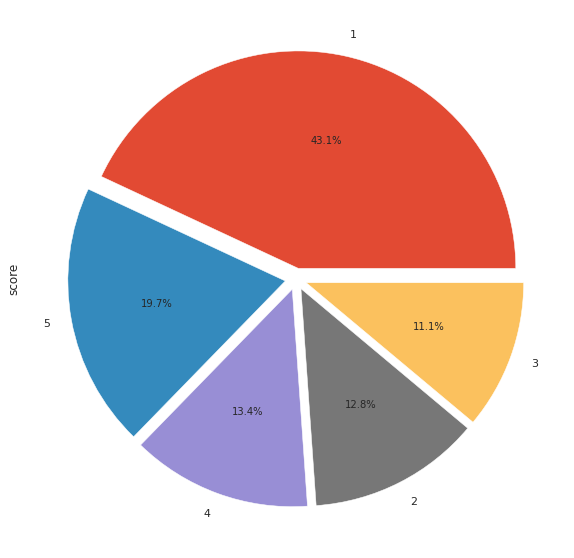

In [76]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
df['score'].value_counts().plot(kind = 'pie', figsize = (10,10), autopct ='%1.1f%%', explode=explode)

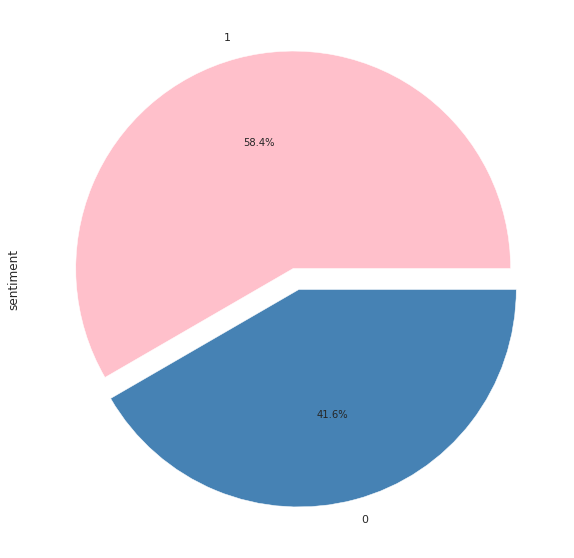

In [77]:
explode = (0.05, 0.05)
colors = ['pink', 'steelblue']
df['sentiment'].value_counts().plot(kind = 'pie', figsize = (10,10), autopct ='%1.1f%%', explode=explode, colors=colors)